In [746]:
import networkx as nx
import csv
import numpy as np
import operator
import pandas as pd
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split






In [805]:
G=nx.Graph()


with open("edges.csv", "r") as f:
    reader = csv.reader(f)
    edges  = list(reader)

with open("nodes.csv", "r") as f:
    nodes = f.read().splitlines()


G.add_nodes_from(nodes)
G.add_edges_from(edges)



# Computation of the centrality

In [101]:
#closeness
clos_dict = nx.closeness_centrality(G,'1')
clos_dict

0.4849952963311383

In [111]:
#betweeness
betw_dict = nx.betweenness_centrality(G)


# Degree Distribution

In [14]:
%matplotlib inline

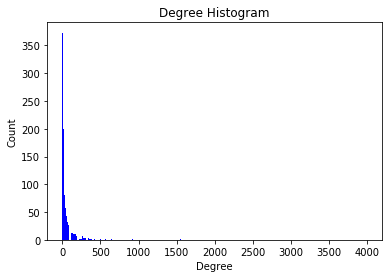

In [19]:
import collections
import matplotlib.pyplot as plt
import networkx as nx


degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())



fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)

# draw graph in inset


plt.show()

In [29]:
# log-log tranformation
import math

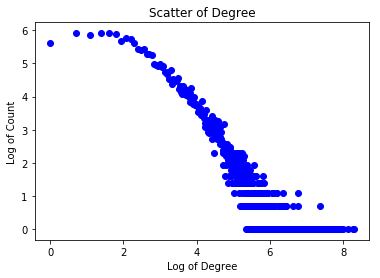

In [45]:
import collections
import matplotlib.pyplot as plt
import networkx as nx


degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

cnt = [math.log(x) for x in cnt]
deg = [math.log(x) for x in deg]

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')

plt.title("Scatter of Degree")
plt.ylabel("Log of Count")
plt.xlabel("Log of Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)

# draw graph in inset


plt.show()

# Calculate alpha 

Calculating best minimal value for power law fit


2.521858651932365


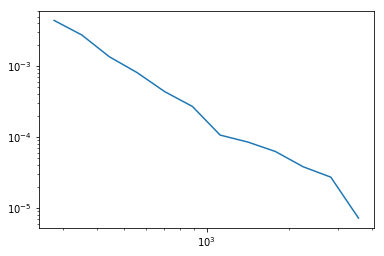

In [31]:
import powerlaw
results = powerlaw.Fit(degree_sequence)
print(results.power_law.alpha)

# probability density function
results.plot_pdf()

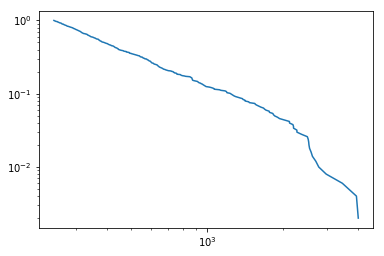

In [32]:
# complementary cumulative distribution function
results.plot_ccdf()

# Best nodes - closeness centrality

In [96]:

with open("output.csv", "r") as f:
    reader = csv.reader(f)
    closeness_res  = list(reader)

In [1146]:
clos_scores = np.argsort([float(x[1]) for x in closeness_res])[::-1]
nodes_list = np.array([x[0] for x in closeness_res])

best_nodes = nodes_list[clos_scores]
best_nodes[:10]



array(['4839', '176', '4374', '8157', '1226', '4984', '4997', '8859',
       '7098', '645'], dtype='<U5')

# Best nodes - betweeness centrality


In [263]:

with open("output_betw.csv", "r") as f:
    reader = csv.reader(f)
    betw_res  = list(reader)

In [920]:
scores_sorted = np.argsort([float(x[1]) for x in betw_res])[::-1]
nodes_list = np.array([(x[0]) for x in betw_res])

nodes_sorted = nodes_list[scores_sorted]
nodes_sorted[:10]



array(['176', '4839', '4374', '8859', '8157', '645', '1226', '7806',
       '233', '446'], dtype='<U5')

In [13]:
len(set(nodes_sorted[:100]).intersection(set(best_nodes[:100])))

82

In [1144]:
#intersection core betweeness
len(set(nodes_sorted[:100]).intersection(set(nodes_in_k[:447])))

95

In [1147]:
#intersection core closeness
len(set(best_nodes[:100]).intersection(set(nodes_in_k[:447])))

100

In [1143]:
len(nodes_in_k)

447

##### We see that the intersection of the first 100 nodes sorted by betweeness centrality and the first 100 by closeness is equal to 82

# Communicability of the graph

In [ ]:
comm_dict = communicability(G)

# Other centralities

In [39]:
#eigenvector centrality 
ecentrality = nx.eigenvector_centrality_numpy(G)

In [1121]:
#katz
katz = nx.katz_centrality_numpy(G)

In [41]:
#pagerank
pr = nx.pagerank(G, alpha=0.9)

In [42]:
#HITs (h hubs a authorities)
h,a = nx.hits(G)

In [79]:
# sort all
sorted_e = sorted(ecentrality.items(), key=operator.itemgetter(1), reverse=True)

sorted_katz = sorted(katz.items(), key=operator.itemgetter(1), reverse=True)


sorted_pr = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)


sorted_h = sorted(h.items(), key=operator.itemgetter(1), reverse=True)
sorted_a = sorted(a.items(), key=operator.itemgetter(1), reverse=True)

# K-core decomposition

In [125]:
# getting k core decomposition of the graph

K_core = nx.k_core(G)



In [133]:
nodes_in_k = list(K_core.nodes())

# Start the supervised algo 

Recognize the most influential nodes fitting a classification model with the centralities as features; the labels are 1 if the node belongs to the k-core, 0 otherwise

In [1133]:
#get the features
ecentrality_feat = [x[1] for x in ecentrality.items()]
katz_feat = [x[1] for x in katz.items()]
pr_feat = [x[1] for x in pr.items()]
h_feat = [x[1] for x in h.items()]
a_feat = [x[1] for x in a.items()]

nodes_cl = np.argsort([int(x[0]) for x in closeness_res])
clos_list = np.array([float(x[1]) for x in closeness_res])
nodes_ordered_clos = list(clos_list[nodes_cl])

nodes_betw = np.argsort([int(x[0]) for x in betw_res])
betw_list = np.array([float(x[1]) for x in betw_res])
nodes_ordered_betw = list(betw_list[nodes_betw])

#labels
labels = []
for x in G.nodes():
    if x in best_spreaders:
        labels.append(1)
    else:
        labels.append(0)

In [1134]:
training_features = np.array([ecentrality_feat, katz_feat, pr_feat, h_feat, a_feat, nodes_ordered_clos, nodes_ordered_betw ]).T
# scale
X = preprocessing.scale(training_features)

In [1135]:
y = np.array(labels)


In [1136]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.53)

In [1137]:
# initialize basic SVM
classifier = svm.LinearSVC()

# train
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [1138]:
predicted_test = classifier.predict(X_test)

In [1139]:
classifier.score(X_test, y_test)

0.8898646176362971

In [177]:
count= 0
for i in range(len(predicted_test)):
    if predicted_test[i] == y_test[i]:
        count+=1

        
    

In [178]:
len(predicted_test)

5466

In [179]:
count

5448

# New closeness measure

sum of core number of neighbors

In [207]:
def core_centrality(G):
    dict_cn= nx.core_number(G)
    core_centrality = {}
    for x in G.nodes():
        sum_cn = 0
        for i in G.neighbors(x):
            sum_cn+= dict_cn[i]
        core_centrality[x]=sum_cn
    return core_centrality
    

In [209]:
cc =core_centrality(G)

In [210]:
sorted_cc = [int(x[0]) for x in sorted(cc.items(), key=operator.itemgetter(1), reverse=True)]

In [211]:
len(set(sorted_cc[:10]).intersection(set(nodes_sorted[:10])))

6

# Simulation of the spreading

we used a probability based model to determine the spreading over the network, i.e. each neighbor to an infected node has some probability p of being infected

In [464]:

sort_by_deg = sorted(G.degree, key=lambda x: x[1], reverse=True)

### Nodes by degree

In [836]:
print(sort_by_deg[-1])
sort_by_deg[500]

('10229', 1)


('3657', 247)

In [499]:
print(model2.get_info())

model2.iteration()['node_count']


{'beta': 0.01, 'gamma': 0.005, 'Infected': ['10229'], 'percentage_infected': 0}


{0: 158, 1: 4260, 2: 5894}

In [524]:
iterations[9]['node_count']

{0: 6732, 1: 3572, 2: 8}

In [652]:
iterations[99]['node_count']

{0: 10311, 1: 1, 2: 0}

('10229', 1)

('4839', 3992)

In [735]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.IndependentCascadesModel as ids



# Model selection
model = ids.IndependentCascadesModel(G)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0)
config.add_model_parameter( "Infected", 1)

# Setting the edge parameters
threshold = 0.5
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)

In [745]:
G.neighbors(sort_by_deg[0][0])

In [1059]:
def spread_to_200(node, G, beta = 0.002):
    
    
    infected_nodes = []

    # Set how many timesteps you want to pass through
    n_timesteps = range(10)
    # Start from the node you have chosen using edge centrality
    infected_nodes.append(node)
    
    for _ in n_timesteps:
        for node in infected_nodes:
            for neighbor in [n for n in G.neighbors(node)]:
                # random.random simply returns a number between [0,1)
                if len(infected_nodes)>200:
                    break
                if random.random() < beta:
                    infected_nodes.append(neighbor)
            #G.remove_node(node)
        #print(_)
        #print(infected_nodes)
        if len(infected_nodes)>200:
            #print('over')
            #print(len(infected_nodes))
            break
    
    return _

def average(node,G):
    results = 0
    for x in range(5):
        results+= spread_to_200(node, G)
    return results/5
        
        
    
    
    
    


In [1060]:
average('4839',G)

3.4

In [1049]:
spread_to_200('4839', G)

3

In [946]:
l=[x[1] for x in spreading.items()]

[[x,l.count(x)] for x in set(l)]


[[2, 62],
 [3, 200],
 [4, 351],
 [5, 401],
 [6, 416],
 [7, 384],
 [8, 404],
 [9, 8094]]

In [1067]:
import operator

sorted_spreading = sorted(spreading.items(), key=operator.itemgetter(1))

sorted_spreading2 = [x[0] for x in sorted_spreading]
len(set(sorted_spreading2[:500]).intersection(set(list(nodes_sorted)[:500])))


286

In [904]:
np.argsort([int(x[1]) for x in spreading.items()])[::-1]

array([10311,  3912,  3920, ...,  3926,  8524,  1251])

In [1132]:
best_spreaders = sorted_spreading2[:2000]


In [1062]:
spreading = {}
count=0
for x in G.nodes():
    count+=1
    spreading[x]=average(x, G)
    if count%100==0:
        print(count)
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300


In [868]:
if 50%10==0:
    print('yes')

yes


In [1118]:


results = 0
for x in range(10):
    infected_nodes = []
    # Set the infection rate
    beta = 0.001
    # Set the removal rate
    gamma = 0.1
    # Set how many timesteps you want to pass through
    n_timesteps = range(20)
    # Start from the node you have chosen using edge centrality
    infected_nodes.append('4839')
    
    for _ in n_timesteps:
    # Infection stage
        for node in infected_nodes:
            for neighbor in [n for n in G.neighbors(node)]:
            
            # random.random simply returns a number between [0,1)
                if len(infected_nodes)>1000:
                    break
                if random.random() < beta:
                    infected_nodes.append(neighbor)
                
        #G.remove_node(node)
        #print(_)
    #print(infected_nodes)
        if len(infected_nodes)>1000:
            #print('over')
            print(len(infected_nodes))
            break
    results+=_
print(results/10)
    # Removal stage
#    infected_survivors = []
#    for node in infected_nodes:
#        if random.random() < gamma:
#            graph = igraph.delete_vertices(graph, node)
#        else:
#            infected_survivors.append(node)
#    infected_nodes = infected_survivors

1001
1001
1001
1001
1001
1001
1001
1001
1001
1001
12.0


In [ ]:
4839

In [ ]:
10229